In [36]:
import pandas as pd 

df1 = pd.read_csv("./dataset/stitching/presentation/figures/reuse/results.csv")
df2 = pd.read_csv("./dataset/stitching/presentation/figures/recompute_all/results.csv")
df3 = pd.read_csv("./dataset/stitching/presentation/figures/recompute_ds/results.csv")


df = pd.concat([df1, df2, df3])
df['ds_method'] = df['ds_method'].replace({
    'reuse': 'Reuse',
    'recompute_all': 'Recompute All', 
    'recompute_ds': 'Recompute DS'
})

In [37]:
df.head()

,combination_id,ds_method,initial_x,initial_y,attractor_x,attractor_y,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations,compute_time
0,0,Reuse,5.221774,6.672078,8.032258,13.327922,0.111956,0.247426,7653.697744,23.897742,0.009997,1.812434e-06,16508.0,3.0,2,7.360974
1,1,Reuse,5.221774,6.672078,1.940860,2.394481,0.333962,0.185240,1109.936936,40.581024,0.009995,1.868923e-06,5982.0,18.0,2,1.327090
2,2,Reuse,5.221774,6.672078,1.161290,13.258929,0.086170,0.071531,1431.768258,19.392179,0.009998,2.049137e-06,9608.0,12.0,2,1.784377
3,3,Reuse,5.221774,6.672078,13.768817,4.553571,0.081312,0.174034,2062.179961,3.896445,0.009992,1.701061e-06,14474.5,17.5,2,3.357312
4,4,Reuse,5.221774,6.672078,12.715054,12.086039,0.059502,0.116961,1169.450530,42.736752,0.009998,2.313083e-07,18951.0,61.0,2,4.665315


In [39]:
nan_counts = df.groupby('ds_method')['prediction_rmse'].apply(lambda x: x.isna().sum())
print(nan_counts)

ds_method
Recompute All    4
Recompute DS     0
Reuse            0
Name: prediction_rmse, dtype: int64


In [23]:
import seaborn as sns

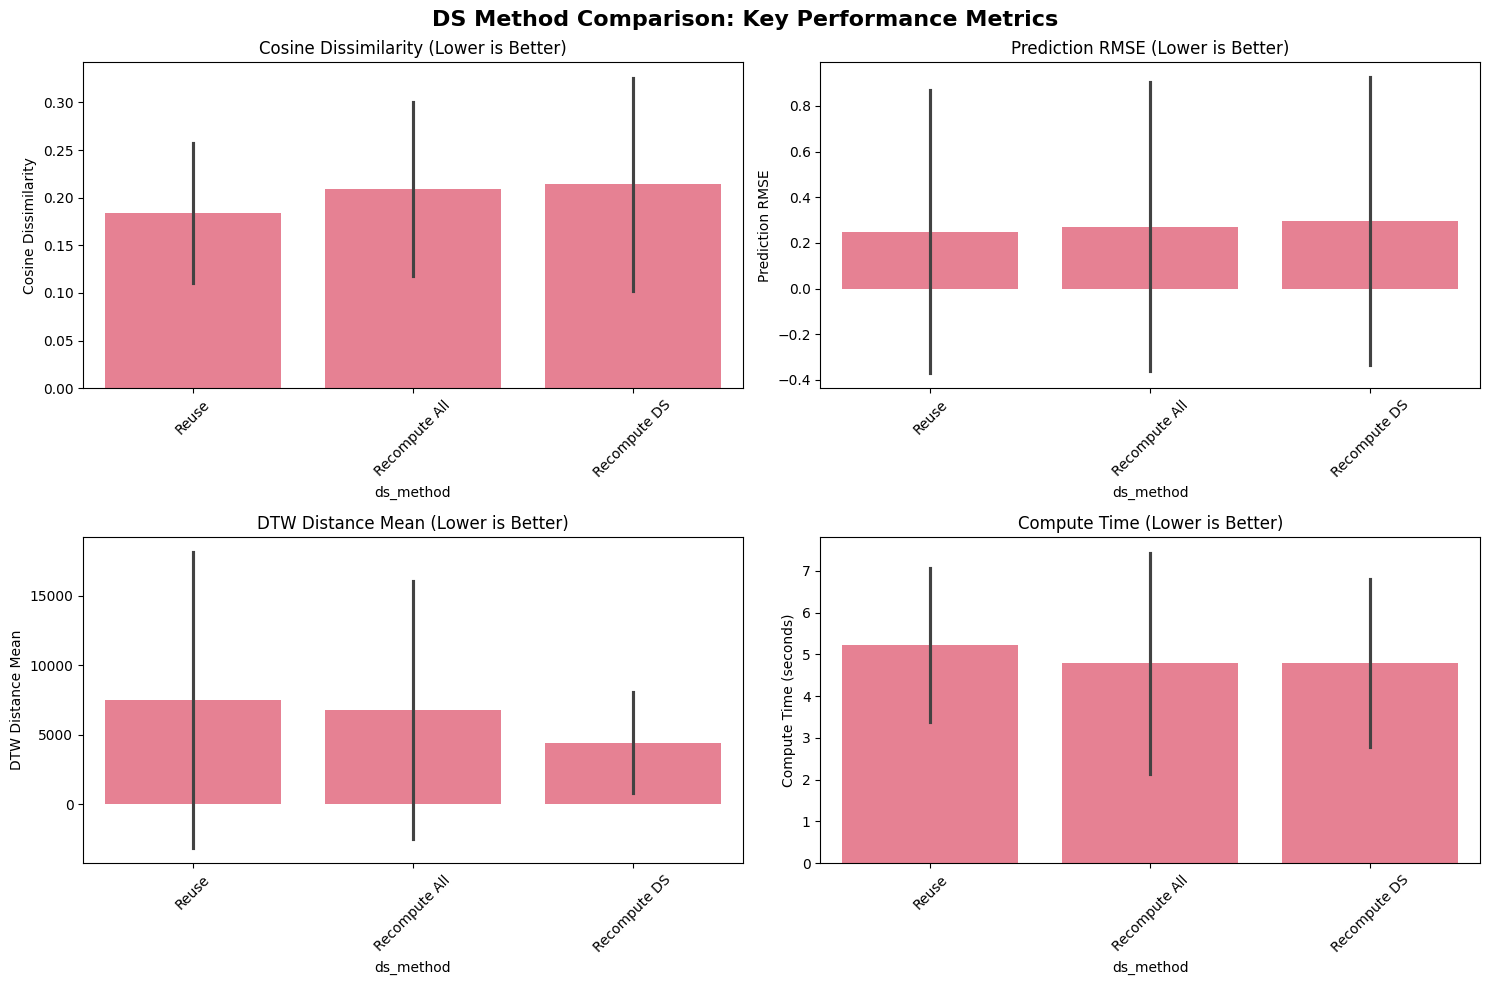

=== Statistical Summary by DS Method ===
              cosine_dissimilarity         prediction_rmse          \
                              mean     std            mean     std   
ds_method                                                            
Recompute All               0.2094  0.0913          0.2698  0.6324   
Recompute DS                0.2138  0.1120          0.2955  0.6302   
Reuse                       0.1839  0.0737          0.2490  0.6202   

              dtw_distance_mean             compute_time          
                           mean         std         mean     std  
ds_method                                                         
Recompute All         6785.9690   9281.1159       4.7809  2.6500  
Recompute DS          4412.4182   3625.1565       4.7958  2.0046  
Reuse                 7472.2092  10645.1833       5.2243  1.8451  


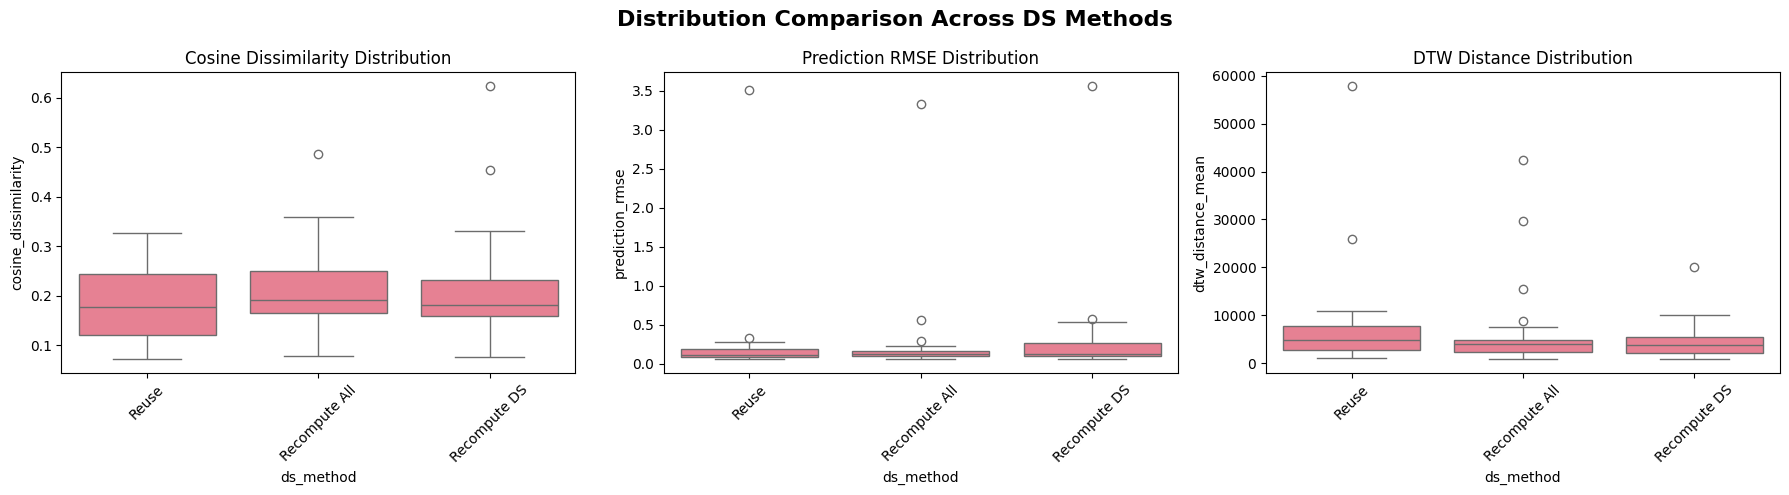

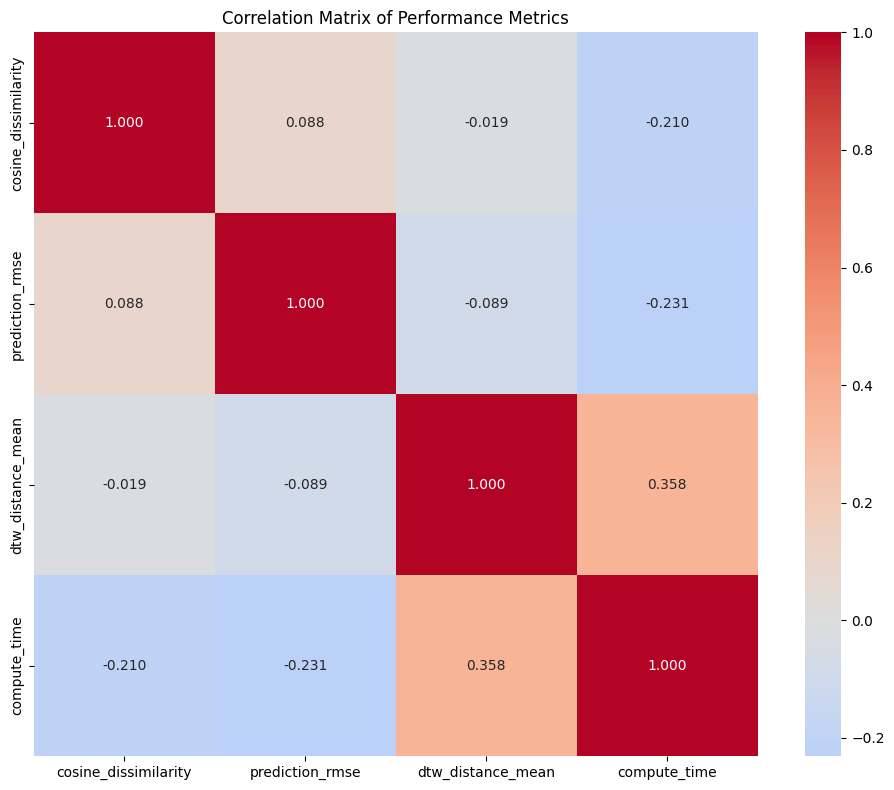

In [ ]:
# Copy this code into your Jupyter notebook cells

# Cell 1: Import libraries and set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("husl")

# IMPORTANT: Reset the index to avoid duplicate index issues
df = df.reset_index(drop=True)

# Cell 2: Create comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('DS Method Comparison: Key Performance Metrics', fontsize=16, fontweight='bold')

# Plot 1: Cosine Dissimilarity
ax1 = axes[0, 0]
sns.barplot(data=df, x="ds_method", y="cosine_dissimilarity", errorbar="sd", ax=ax1)
ax1.set_title('Cosine Dissimilarity (Lower is Better)')
ax1.set_ylabel('Cosine Dissimilarity')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Prediction RMSE
ax2 = axes[0, 1]
sns.barplot(data=df, x="ds_method", y="prediction_rmse", errorbar="sd", ax=ax2)
ax2.set_title('Prediction RMSE (Lower is Better)')
ax2.set_ylabel('Prediction RMSE')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: DTW Distance Mean
ax3 = axes[1, 0]
sns.barplot(data=df, x="ds_method", y="dtw_distance_mean", errorbar="sd", ax=ax3)
ax3.set_title('DTW Distance Mean (Lower is Better)')
ax3.set_ylabel('DTW Distance Mean')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Compute Time (if available)
ax4 = axes[1, 1]
if 'compute_time' in df.columns:
    sns.barplot(data=df, x="ds_method", y="compute_time", errorbar="sd", ax=ax4)
    ax4.set_title('Compute Time (Lower is Better)')
    ax4.set_ylabel('Compute Time (seconds)')
else:
    # Create a summary comparison if compute_time not available
    methods = df['ds_method'].unique()
    metrics_summary = []
    for method in methods:
        method_data = df[df['ds_method'] == method]
        avg_cosine = method_data['cosine_dissimilarity'].mean()
        avg_rmse = method_data['prediction_rmse'].mean()
        avg_dtw = method_data['dtw_distance_mean'].mean()
        # Normalize and average (lower is better, so we invert)
        normalized_score = (1/avg_cosine + 1/avg_rmse + 1/avg_dtw) / 3
        metrics_summary.append(normalized_score)
    
    ax4.bar(methods, metrics_summary)
    ax4.set_title('Overall Performance Score\n(Higher is Better)')
    ax4.set_ylabel('Normalized Performance Score')

ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cell 3: Statistical summary table
print("=== Statistical Summary by DS Method ===")
metrics_cols = ['cosine_dissimilarity', 'prediction_rmse', 'dtw_distance_mean']
if 'compute_time' in df.columns:
    metrics_cols.append('compute_time')

summary_stats = df.groupby('ds_method')[metrics_cols].agg(['mean', 'std']).round(4)
print(summary_stats)

# Cell 4: Box plots for distribution comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution Comparison Across DS Methods', fontsize=16, fontweight='bold')

# Cosine Dissimilarity box plot
sns.boxplot(data=df, x="ds_method", y="cosine_dissimilarity", ax=axes[0])
axes[0].set_title('Cosine Dissimilarity Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Prediction RMSE box plot
sns.boxplot(data=df, x="ds_method", y="prediction_rmse", ax=axes[1])
axes[1].set_title('Prediction RMSE Distribution')
axes[1].tick_params(axis='x', rotation=45)

# DTW Distance box plot
sns.boxplot(data=df, x="ds_method", y="dtw_distance_mean", ax=axes[2])
axes[2].set_title('DTW Distance Distribution')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cell 5: Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['cosine_dissimilarity', 'prediction_rmse', 'dtw_distance_mean']
if 'compute_time' in df.columns:
    correlation_cols.append('compute_time')

corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Performance Metrics')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='ds_method'>

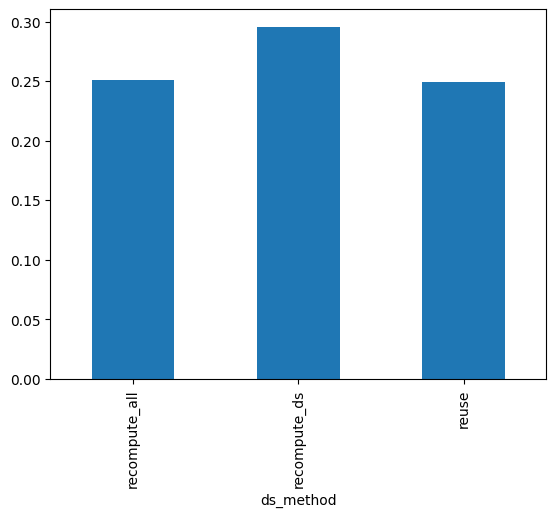

In [12]:
df.groupby("ds_method").mean()["prediction_rmse"].plot(kind="bar")

<AxesSubplot:xlabel='ds_method'>

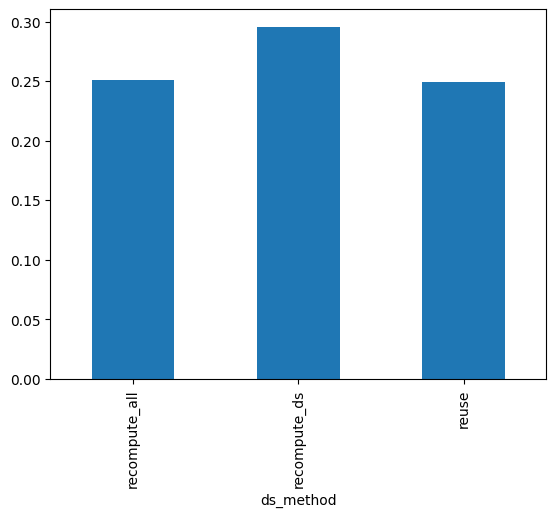

In [ ]:
df.groupby("ds_method").mean()["prediction_rmse"].plot(kind="bar")